In [1]:
import pandas as pd 

from porise.model.algorithms.cmab import LinUCB
from porise.envs.synthetic import LinearEnv
from porise import Simulator

In [2]:
# env = RealEnv(rat_log_path='../porise/data/reward_nov02_nov30_exp5217.csv', user_vectors_map=user_map)
env = LinearEnv(n_arms=8, user_feat_dim=100, max_steps=int(5e4))

In [3]:
model = LinUCB(n_arms=env.n_arms,
              alpha=2,
              arm_feat_dim=env.arm_feat_dim+env.user_feat_dim,
              return_list=False)

### Train with past N records, every time a new record comes.

In [4]:
simulator = Simulator(model=model,
                     env=env,
                     train_every=int(128),
                     throttle=int(1e2),
                     memory_capacity=int(128),
                     plot_every=int(1e3))

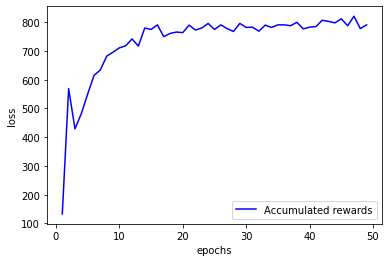

50000it [01:09, 714.44it/s, total reward=36635.0]                           


In [5]:
simulator.run()

In [6]:
from porise.model.algorithms.mab.thompson_sampling import BetaThompsonSampling

In [7]:
model = BetaThompsonSampling(
            n_arms=env.n_arms,
            return_list=False
        )

In [8]:
env.reset()

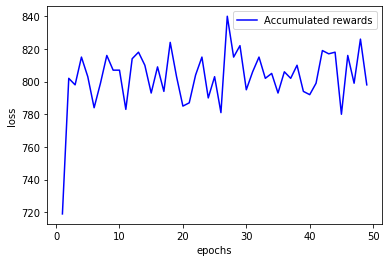

50000it [00:09, 5196.56it/s, total reward=4e+4]                              


In [9]:
simulator = Simulator(model=model,
                     env=env,
                     train_every=int(128),
                     throttle=int(1e2),
                     memory_capacity=int(128),
                     plot_every=int(1e3))
simulator.run()